In [25]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from scipy.io import wavfile

In [27]:
# create the signal 
duration = 10  # seconds
wav_raw_data = wavfile.read("output/oppa_output.wav")
fs = wav_raw_data[0]  # sample frequency in Hz
signal = wav_raw_data[1] / 2 ** 15  # normalize to [-1, 1]
signal.shape

(11113200,)

In [28]:
# Split the signal into chunks
chunk_size = int(fs // 2.5)  # 1 second chunks
num_chunks = len(signal) // chunk_size
print("num_chunks", num_chunks)
chunks = np.array(np.split(signal[:num_chunks * chunk_size], num_chunks))

num_chunks 630


In [29]:
pprint(chunks)
chunks.shape


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00592041,  0.01187134, ..., -0.01187134,
        -0.00592041,  0.        ],
       [ 0.        ,  0.00592041,  0.01187134, ..., -0.01187134,
        -0.00592041,  0.        ],
       ...,
       [-0.0067749 , -0.00521851, -0.0010376 , ...,  0.00524902,
         0.0067749 ,  0.00872803],
       [ 0.01135254,  0.01269531,  0.01116943, ..., -0.02017212,
        -0.01980591, -0.01928711],
       [-0.01828003, -0.0177002 , -0.01739502, ..., -0.00881958,
        -0.00970459, -0.01000977]])


(630, 17640)

In [30]:
# Compute the FFT for each chunk
fft_chunks = np.array([np.fft.fft(chunk) for chunk in chunks])
fft_chunks.shape

(630, 17640)

In [31]:
# Compute the frequencies for the x-axis
frequencies = np.fft.fftfreq(chunk_size, 1 / fs)
frequencies

array([ 0. ,  2.5,  5. , ..., -7.5, -5. , -2.5])

In [32]:
# find the dominant frequency
dominant_frequencies = np.abs(fft_chunks)[0].argmax()
dominant_frequencies


0

(630, 8820)


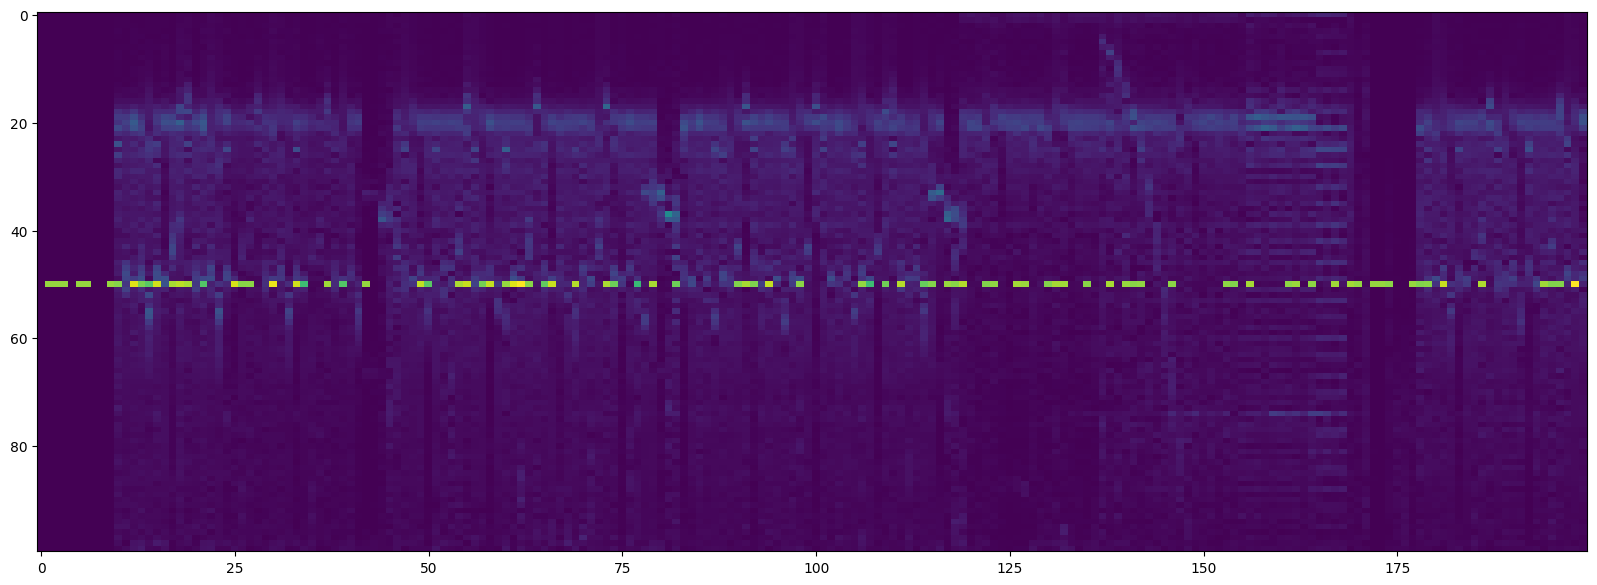

In [33]:
fft_mags = np.abs(fft_chunks)
fft_mags = np.array([fft_mag[:len(fft_mag) // 2] for fft_mag in fft_mags])
print(fft_mags.shape)
frequencies_chunk = frequencies[:len(frequencies) // 2]
fft_mags = fft_mags.T
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[0:100, :200], aspect='auto')


# decode the code

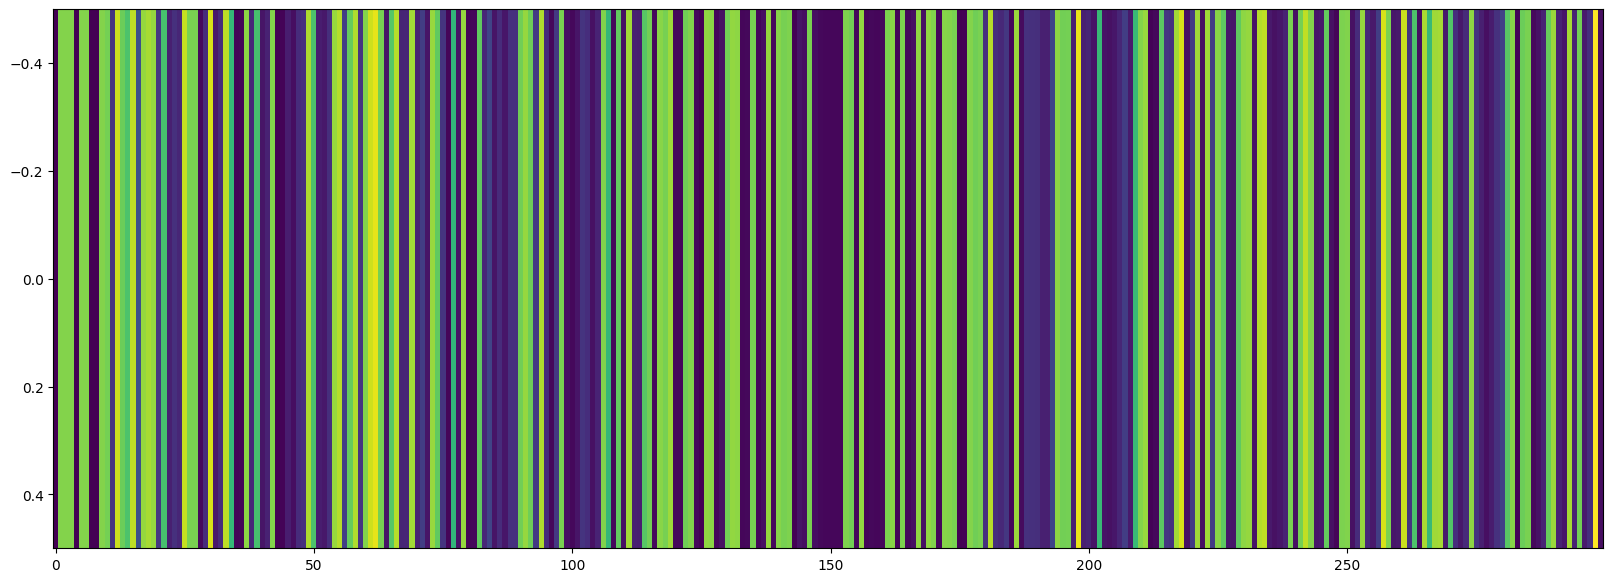

In [34]:
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[50:51, :300], aspect='auto')

In [35]:
fft_mags[50:51, :]

array([[0.00000000e+00, 2.93975320e+03, 2.93975320e+03, 2.93975320e+03,
        0.00000000e+00, 2.93975320e+03, 2.93975320e+03, 0.00000000e+00,
        0.00000000e+00, 2.93974751e+03, 2.85784393e+03, 5.48717739e+02,
        3.32035088e+03, 2.79774266e+03, 2.59550887e+03, 3.25547717e+03,
        8.83297615e+02, 3.04422347e+03, 3.13364423e+03, 3.04343851e+03,
        5.69077766e+02, 2.56494713e+03, 3.12717662e+02, 4.94900538e+02,
        3.81097302e+02, 3.28590466e+03, 2.87888982e+03, 2.88451241e+03,
        9.24873176e+01, 4.65086652e+02, 3.38979965e+03, 2.42151218e+02,
        4.43378725e+02, 3.24493059e+03, 2.40603745e+03, 4.18208268e+01,
        5.32674795e+01, 2.99618280e+03, 4.18368295e+02, 2.56507627e+03,
        1.98544417e+02, 3.49710370e+02, 2.94184202e+03, 1.28078804e+01,
        3.85507733e+01, 2.93856642e+02, 1.34322082e+02, 4.59959523e+02,
        5.14419389e+02, 3.16787213e+03, 2.60166040e+03, 2.91328761e+02,
        2.36240361e+02, 4.83848349e+02, 3.05103390e+03, 3.203934

In [36]:
binary = np.where(fft_mags[50:51, :] > 1000, 1, 0)

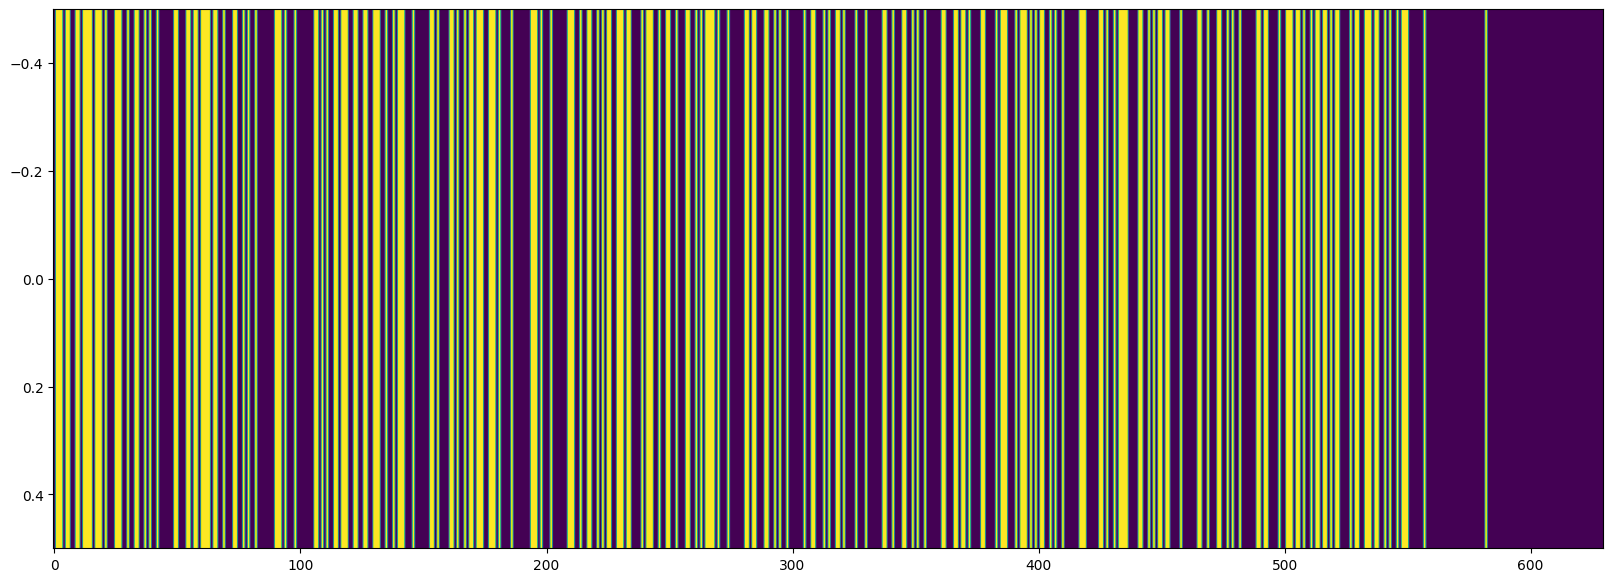

In [37]:
fig = plt.figure(figsize=(20, 7))
plt.imshow(binary, aspect='auto')


In [38]:
binary = list(binary[0])
binary

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,


In [39]:
binary = "".join([str(bit) for bit in binary])
binary

'011101100110111101110100011100100110010100100000011000110110111101100100011001010010000000111010001000000011010100110111001100110011100100101110001000000110100001101001011011100111010000100000001110100010000001110010011001010110011101100001011100100110010001100101011110100010000001101100011001010010000001001100010100110100001000100000011001000110010100100000011000110110100001100001011100010111010101100101001000000111000001101001011110000110010101101100001000000110010001100101001000000110110000100111011010010110110101100001011001110110010100101110000001000000000000000000000000100000000000000000000000000000000000000000000000'

In [40]:
message = ""
for i in range(len(binary) // 8):
    byte: str = binary[i * 8: (i + 1) * 8]
    message += chr(int(byte, 2))
message

"votre code : 5739. hint : regardez le LSB de chaque pixel de l'image.\x04\x00\x00\x02\x00\x00\x00\x00\x00"

In [41]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |
 |  Built-in subclasses:
 |      bool
 |
 |  Methods defined here:
 |
 |  __abs__(self, /)
 |      abs(self)
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __and__(self, value, /)
 |      Return self&value.
 |
 |  __bool__(self, /)
 |      True if self else False
